# Sample notebook for using opencroplib to calculate ETo

This simple notebook will demonstrate the use of opencroplib to calculate ETo
from downloaded weather data.

First, activate the inline mode for plotting.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import `pandas` and `opencroplib` libraries

In [2]:
import pandas as pd
import opencroplib
from opencroplib.atmophere import ea_calc
from opencroplib.radiation import daily_clear_sky_irradiance, daily_potential_toa
from opencroplib.radiation import net_out_lw_daily, net_in_sol_rad, net_rad
from opencroplib.evapotranspiration import et0_FAO56_daily

## Data download
We will download the data from the University of Cordoba:
http://www.uco.es/grupos/meteo/

We will download the historic data from 2000 for the **IAS-CSIC** weather station, located at: 
https://goo.gl/maps/LPZCZSc9v9a8x8QG6

In [3]:
weather_ias = pd.read_csv("http://www.uco.es/grupos/meteo/archivos/arc_ias.day", skiprows=12, delim_whitespace=True, encoding='ISO-8859-1', parse_dates=True)
weather_ias['date'] = pd.to_datetime(weather_ias[u'Año'] * 1000 + weather_ias['DDA'], format='%Y%j')
weather_ias.set_index('date', inplace=True)

# Coordinates of Weather Station
site_lat = 37.85694444
site_long = -4.80277777
site_alt = 117.0

In [4]:
for column in weather_ias.columns:
    weather_ias[column] = pd.to_numeric(weather_ias[column], errors='coerce')

In [5]:
weather_ias.head(10)

,Año,DDA,VIE,Tmed,HR,Rs,Prec,DPV,Tmax,Tmin,Rn,ET0
date,,,,,,,,,,,,
2000-03-29,2000,89,1.7,11.7,60.9,22.4,0.1,0.8,20.1,3.3,11.7,3.7
2000-03-30,2000,90,1.3,12.7,74.1,18.2,0.0,0.5,18.9,6.6,10.0,2.9
2000-03-31,2000,91,2.0,15.8,64.8,24.5,0.0,0.8,20.8,10.9,14.1,4.0
2000-04-01,2000,92,2.0,14.2,66.4,21.7,0.0,0.9,22.4,6.0,12.4,3.9
2000-04-02,2000,93,3.3,13.4,83.8,8.3,12.1,0.3,18.3,8.6,5.2,1.4
2000-04-03,2000,94,2.5,11.8,81.4,12.8,9.0,0.3,15.9,7.7,7.6,1.8
2000-04-04,2000,95,2.9,12.7,75.6,15.0,0.4,0.4,16.6,8.8,9.0,2.3
2000-04-05,2000,96,1.5,10.8,73.5,25.4,0.1,0.5,17.2,4.4,14.4,3.6
2000-04-06,2000,97,1.9,13.5,65.0,24.6,0.0,0.8,20.4,6.6,13.3,3.8


### Description of the variables

| Variable | Description                  | Units     |
|----------|------------------------------|-----------|
| Año      | Year                         |           |
| DDA      | Day of the year              |           |
| VIE      | Wind speed                   | m/s       |
| Tmed     | Average air temperature      | Celsius   |
| HR       | Relative Humidity            | %         |
| Rs       | Solar radiation              | MJ/day/m2 |
| Prec     | Rainfall                     | mm/day    |
| DPV      | Pressure Vapour Deficit      | kPa       |
| Tmax     | Maximum air temperature      | Celsius   |
| Tmin     | Minimum air temperature      | Celsius   |
| Rn       | Net radiation                | MJ/day/m2 |
| ET0      | Reference Evapotranspiration | mm/day    |

## Calculation of ETo

In [6]:
# Calculate clear sky radition for clearness index in longwave radiation
weather_ias['cs_rad'] = daily_clear_sky_irradiance(site_alt, daily_potential_toa(site_lat, weather_ias.index.dayofyear))
# Calculate net longwave radiation
weather_ias['net_lw'] = net_out_lw_daily(weather_ias.Tmin, weather_ias.Tmax, weather_ias.Rs, weather_ias.cs_rad, ea_calc(weather_ias.Tmed, weather_ias.HR)/1000.0)
# Calculate net radiation
weather_ias['net_rad'] = net_rad(net_in_sol_rad(weather_ias.Rs), weather_ias.net_lw)
# Calculate ETo
weather_ias['et0_calc'] = et0_FAO56_daily(weather_ias.Tmed, weather_ias.HR, 100500.0, weather_ias.VIE, weather_ias.Rs, weather_ias.net_rad)

In [7]:
weather_ias.head(10)

,Año,DDA,VIE,Tmed,HR,Rs,Prec,DPV,Tmax,Tmin,Rn,ET0,cs_rad,net_lw,net_rad,et0_calc
date,,,,,,,,,,,,,,,,
2000-03-29,2000,89,1.7,11.7,60.9,22.4,0.1,0.8,20.1,3.3,11.7,3.7,23.919752,6.286906,10.961094,3.061384
2000-03-30,2000,90,1.3,12.7,74.1,18.2,0.0,0.5,18.9,6.6,10.0,2.9,24.091945,4.268814,9.745186,2.534990
2000-03-31,2000,91,2.0,15.8,64.8,24.5,0.0,0.8,20.8,10.9,14.1,4.0,24.262903,6.562794,12.302206,3.701163
2000-04-01,2000,92,2.0,14.2,66.4,21.7,0.0,0.9,22.4,6.0,12.4,3.9,24.432574,5.557625,11.151375,3.252423
2000-04-02,2000,93,3.3,13.4,83.8,8.3,12.1,0.3,18.3,8.6,5.2,1.4,24.600907,0.633108,5.757892,1.687974
2000-04-03,2000,94,2.5,11.8,81.4,12.8,9.0,0.3,15.9,7.7,7.6,1.8,24.767853,2.154284,7.701716,1.973087
2000-04-04,2000,95,2.9,12.7,75.6,15.0,0.4,0.4,16.6,8.8,9.0,2.3,24.933363,2.916111,8.633889,2.440621
2000-04-05,2000,96,1.5,10.8,73.5,25.4,0.1,0.5,17.2,4.4,14.4,3.6,25.097391,6.610091,12.947909,3.030792
2000-04-06,2000,97,1.9,13.5,65.0,24.6,0.0,0.8,20.4,6.6,13.3,3.8,25.259891,6.397806,12.544194,3.479773


## Comparison with reported values

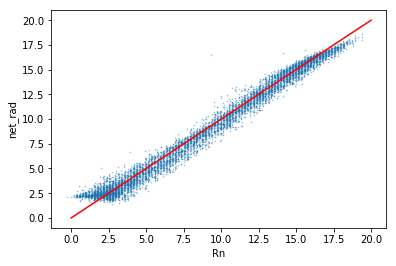

In [8]:
ax = weather_ias.plot.scatter(x='Rn', y='net_rad', marker='.', alpha=0.5, s=1)
ax.plot([0,20], [0,20], c='r')

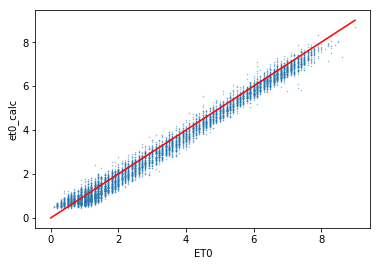

In [9]:
ax = weather_ias.plot.scatter(x='ET0', y='et0_calc', marker='.', alpha=0.5, s=1)
ax.plot([0,9], [0,9], c='r')